# 워드클라우드 (한글, Mecab)

## #01. Mecab 형태소 분석기

### 1. Mecab 소개

Mecab 형태소 분석기는 일본에서 만든 오픈소스 형태소 분석기

검색 엔진에 사용하기 위해서 만들어졌으며, 특정 언어에 국한되지 않고 범용적으로 설계되었기 때문에 한글을 지원하는 은전한닢 이라는 오픈소스 프로젝트로 한글화되어 사용되고 있음.

C++로 작성되었으며, 다양한 플랫폼에서 사용할 수 있습니다. 형태소 분석의 성능과 속도면에서 우수한 결과를 제공함

### 2. Mecab 설치

#### mecab-ko-msvc 설치 (본체)

1. https://github.com/Pusnow/mecab-ko-msvc/releases 에 접속
1. `mecab-ko-windows-x64.zip` 파일을 내려받는다.
1. 내려 받은 파일의 압축을 해제해서 나타난 `mecab` 폴더를 C드라이브 root로 옮김

> C:\mecab

#### mecab-ko-dic-msvc 설치 (사전)

1. https://github.com/Pusnow/mecab-ko-dic-msvc/releases 에 접속
1. 같은 페이지에서 `mecab-ko-dic-msvc.zip` 파일을 내려받아 압축을 해제
1. 압축 해제된 폴더의 내용물만 `C:\mecab` 폴더 안으로 이동 (폴더병합)

#### python wheel 설치하기

1. https://github.com/Pusnow/mecab-python-msvc/releases 페이지에 접속
1. 자신의 파이썬 및 윈도우 버전에 맞는 버전을 내려받는다.
    - python 3.11 : `cp311`
    - Windows 32bit : `win32`
    - Windows 64bit : `win_amd64`
1. 내려받은 wheel 파일이 위치하는 폴더에서 명령프롬프트 실행
1. 아래 명령어로 설치 진행
    ```shell
    $ python -m pip install <whl파일명>
    ```
    ```shell
    $ python -m pip install mecab_python-0.996_ko_0.9.2_msvc-cp311-cp311-win_amd64.whl
    ```

설치 도중 `C++` 관련 에러가 발생한다면 `Visual C++ 재배포 가능도구 2015-2022`를 설치후 다시 시도

> https://learn.microsoft.com/ko-kr/cpp/windows/latest-supported-vc-redist?view=msvc-170

### 3. 사용자 사전 추가

`C:\mecab\user-dic` 폴더에 `utf-8` 형식의 csv 파일을 추가한다.

기존 파일들은 각각 고유명사(nnp.csv), 인명(person.csv), 지명(place.csv)을 담고 있는 파일

> ex) C:\mecab\user-dic\mydic.csv

#### 사전 파일의 체계

```
단어, 0, 0, 우선순위, 품사 태그, 종성 유무, 읽기, 타입, 첫 번째 품사, 마지막 품사, 원형, 인덱스 표현
```

#### 추가예시

```
대우,,,,NNP,*,F,대우,*,*,*,*,*
```

#### 사전 컴파일

> 추후 정리



## #02. 작업 준비

### 패키지 가져오기

In [6]:
import warnings
warnings.filterwarnings(action='ignore')

import sys
from IPython.display import Image, display
from wordcloud import WordCloud

# 한글 형태소 분석기
from konlpy.tag import Mecab

# 파이썬 내장 클래스 --> 설치 불필요
from collections import Counter

### 형태소 분석 테스트

#### 객체 생성

In [7]:
if sys.platform == 'win32':
    mecab = Mecab(dicpath="C:\\mecab\\mecab-ko-dic")
else:
    mecab = Mecab()

#### 분석을 위한 샘플 문장

In [8]:
sample = "개봉했을때부터 지금까지 마음이답답하거나 힘들때 이영화 보고있어요 그때마다 심적인 위로를 받을수있는영화같아요 장면 하나하나가 너무예쁘고 마음에 남아서 진한 여운까지 주는영화 감사합니다. 알잘딱깔센"

#### 토큰화 (without 품사)

모든 품사별로 분리

In [9]:
mecab.morphs(sample)

['개봉',
 '했',
 '을',
 '때',
 '부터',
 '지금',
 '까지',
 '마음',
 '이',
 '답답',
 '하',
 '거나',
 '힘들',
 '때',
 '이',
 '영화',
 '보',
 '고',
 '있',
 '어요',
 '그때',
 '마다',
 '심',
 '적',
 '인',
 '위로',
 '를',
 '받',
 '을',
 '수',
 '있',
 '는',
 '영화',
 '같',
 '아요',
 '장면',
 '하나하나',
 '가',
 '너무',
 '예쁘',
 '고',
 '마음',
 '에',
 '남',
 '아서',
 '진한',
 '여운',
 '까지',
 '주',
 '는',
 '영화',
 '감사',
 '합니다',
 '.',
 '알',
 '잘',
 '딱',
 '깔',
 '센']

### 토큰화 (with 품사)

In [10]:
mecab.pos(sample)

[('개봉', 'NNG'),
 ('했', 'XSV+EP'),
 ('을', 'ETM'),
 ('때', 'NNG'),
 ('부터', 'JX'),
 ('지금', 'NNG'),
 ('까지', 'JX'),
 ('마음', 'NNG'),
 ('이', 'JKS'),
 ('답답', 'XR'),
 ('하', 'XSA'),
 ('거나', 'EC'),
 ('힘들', 'VA+ETM'),
 ('때', 'NNG'),
 ('이', 'MM'),
 ('영화', 'NNG'),
 ('보', 'VV'),
 ('고', 'EC'),
 ('있', 'VX'),
 ('어요', 'EF'),
 ('그때', 'NNG'),
 ('마다', 'JX'),
 ('심', 'NNG'),
 ('적', 'XSN'),
 ('인', 'VCP+ETM'),
 ('위로', 'NNG'),
 ('를', 'JKO'),
 ('받', 'VV'),
 ('을', 'ETM'),
 ('수', 'NNB'),
 ('있', 'VV'),
 ('는', 'ETM'),
 ('영화', 'NNG'),
 ('같', 'VA'),
 ('아요', 'EF'),
 ('장면', 'NNG'),
 ('하나하나', 'NNG'),
 ('가', 'JKS'),
 ('너무', 'MAG'),
 ('예쁘', 'VA'),
 ('고', 'EC'),
 ('마음', 'NNG'),
 ('에', 'JKB'),
 ('남', 'VV'),
 ('아서', 'EC'),
 ('진한', 'VA+ETM'),
 ('여운', 'NNG'),
 ('까지', 'JX'),
 ('주', 'VX'),
 ('는', 'ETM'),
 ('영화', 'NNG'),
 ('감사', 'NNG'),
 ('합니다', 'XSV+EF'),
 ('.', 'SF'),
 ('알', 'NNG'),
 ('잘', 'MAG'),
 ('딱', 'MAG'),
 ('깔', 'VV+ETM'),
 ('센', 'NNG')]

### 명사만 추출

In [26]:
mecab.nouns(sample)


['개봉',
 '때',
 '지금',
 '마음',
 '때',
 '영화',
 '그때',
 '심',
 '위로',
 '수',
 '영화',
 '장면',
 '하나하나',
 '마음',
 '여운',
 '영화',
 '감사',
 '알',
 '센']

In [25]:
with open("wordcloud/대한민국헌법.txt", 'r', encoding="utf-8") as f:
    text = f.read()
    # print(text)

In [24]:
nouns = mecab.nouns(text)

In [21]:
with open('wordcloud/stopwords-ko.txt', 'r', encoding='utf-8') as f:
    stopwords = f.readlines()
    
    for i, v in enumerate(stopwords):
        stopwords[i] = v.strip()

    # print(stopwords)

In [22]:
data_set = [v for v in nouns if v not in stopwords]
# print(data_set)

In [23]:
count = Counter(data_set)
# count

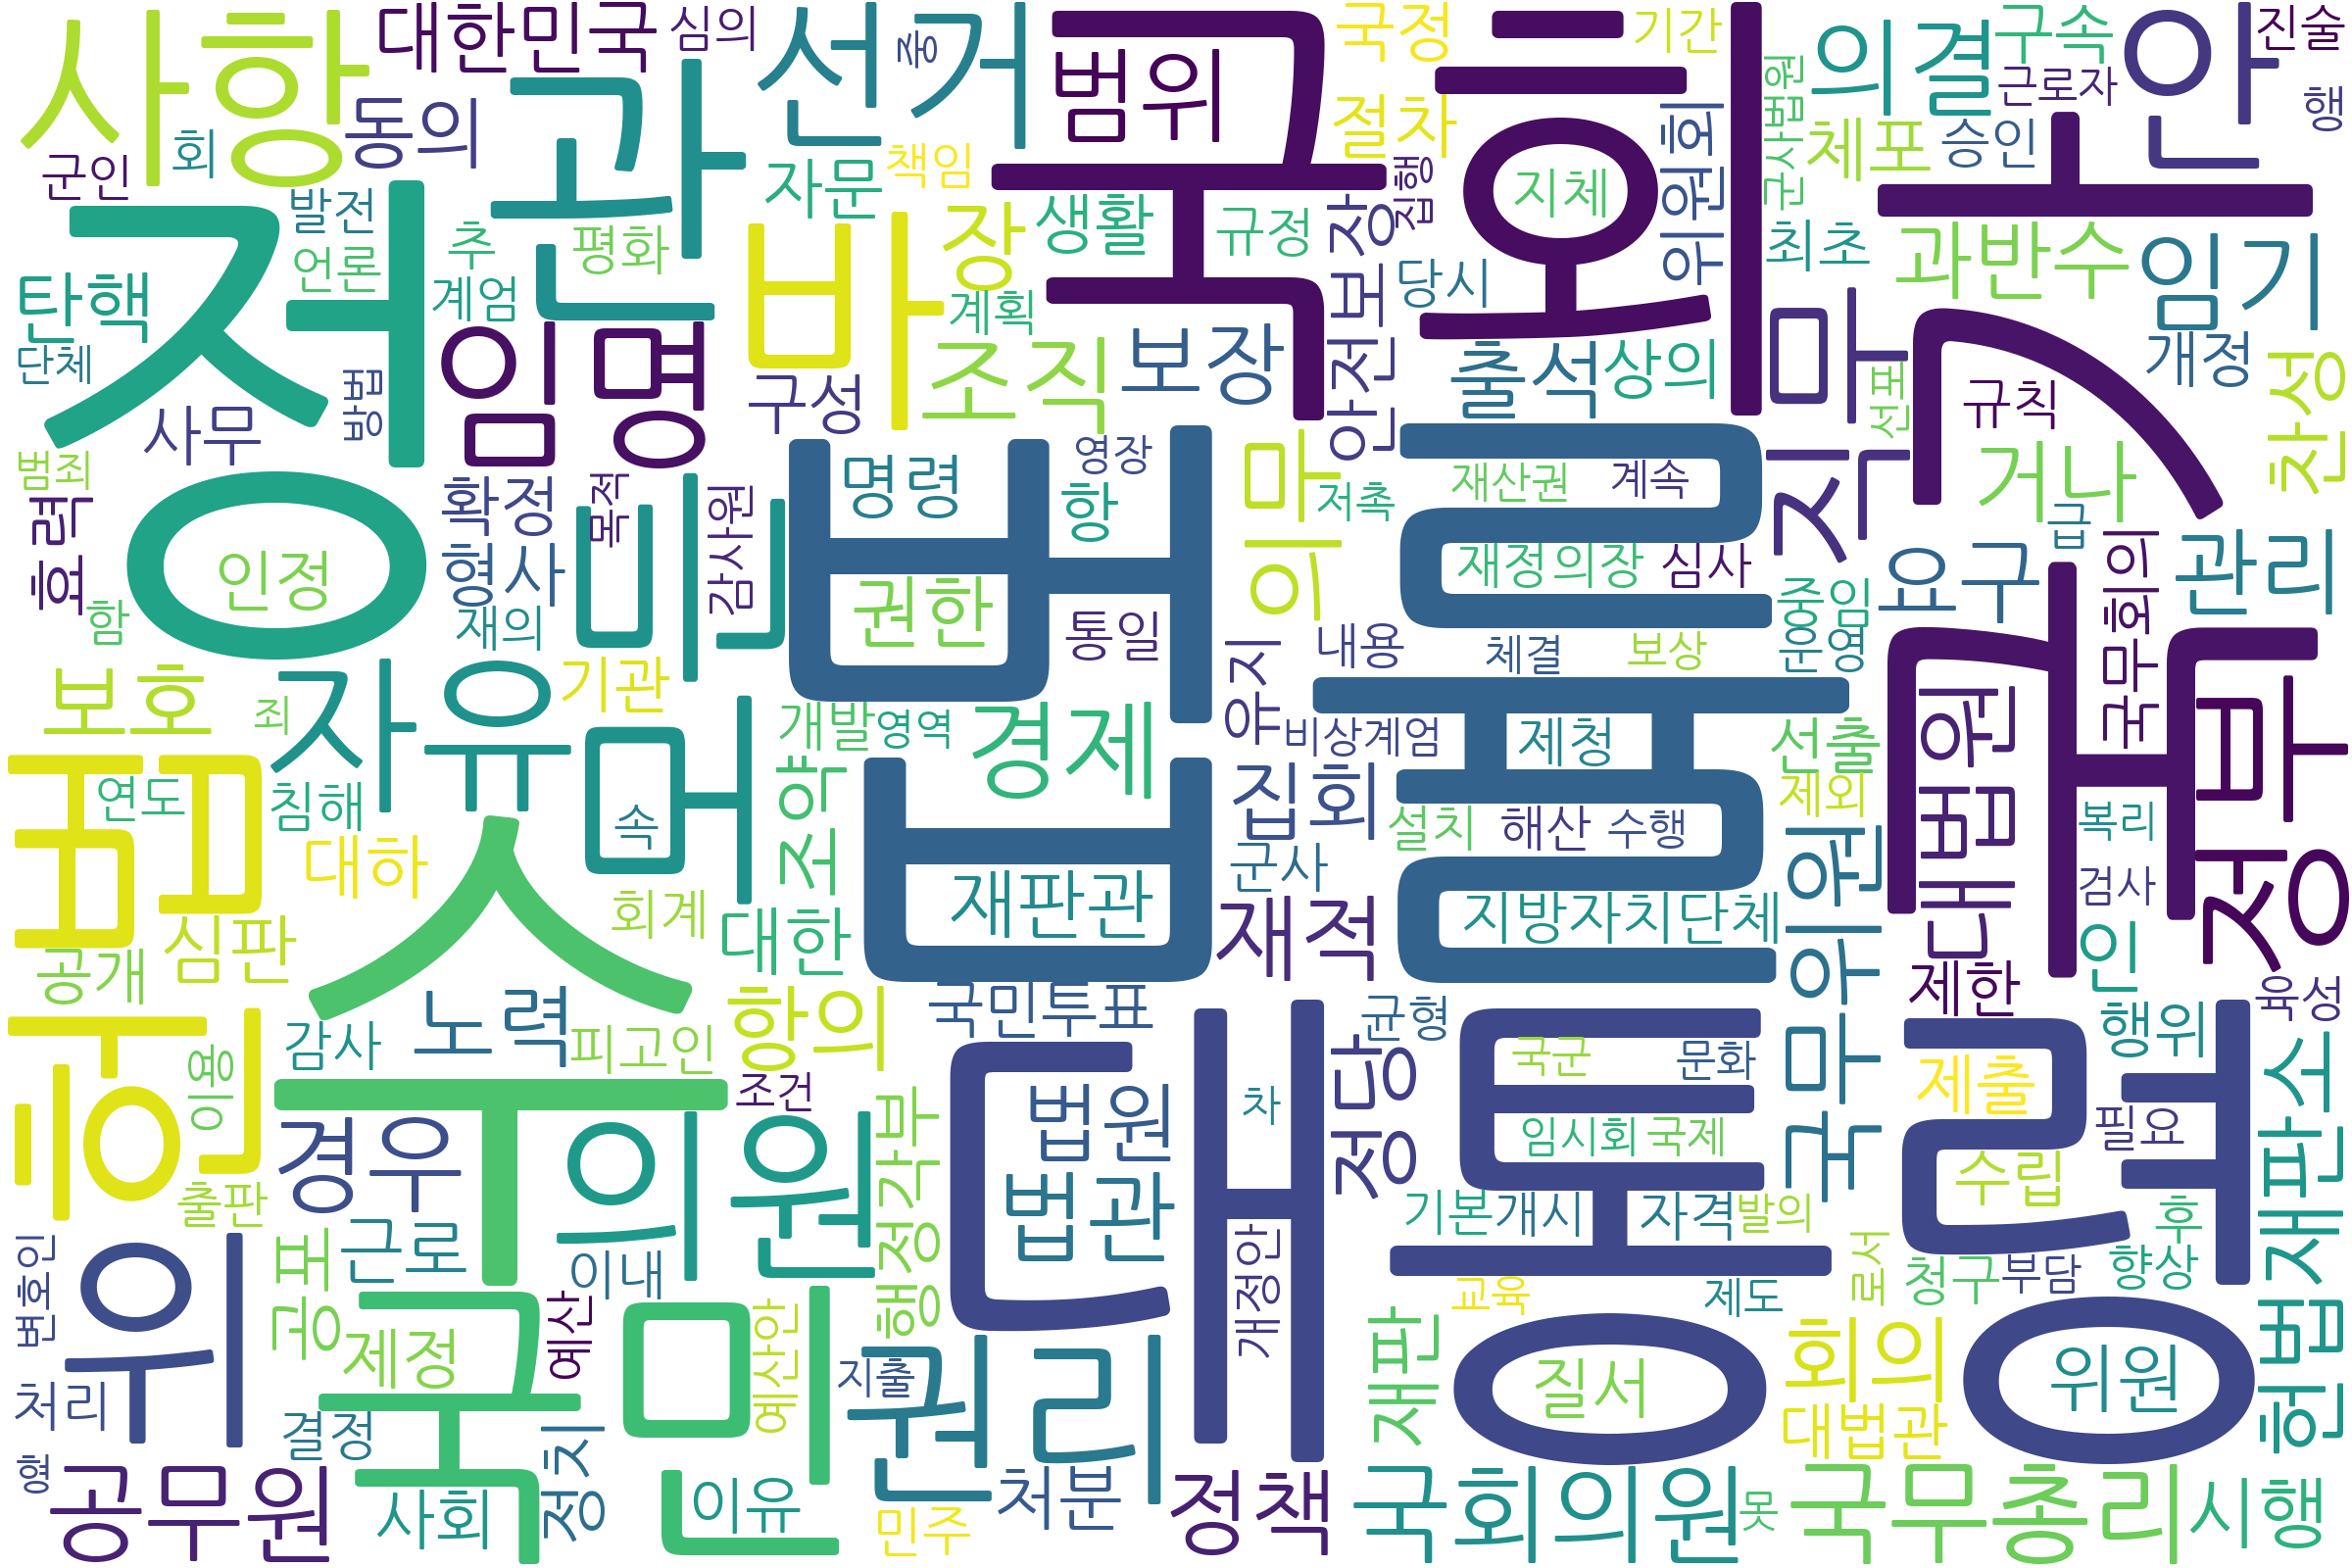

In [18]:
# 워드 클라우드 객체 생성 -> 한글은 폰트파일의 경로를 지정해야 함
wc = WordCloud(font_path="./wordcloud/NanumGothic.ttf", width=1200, height=800, scale=2.0,background_color="#ffffff")

# 직접 생성한 빈도수를 이용해서 워드 클라우드를 그린다.
wc = wc.generate_from_frequencies(count)
wc.to_file("./res/대한민국헌법-주요단어.png")
display(Image(filename='./res/대한민국헌법-주요단어.png'))